# Store Item Demand Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Reading dataset and checking the data**

In [2]:
train = pd.read_csv('store_item_train.csv')
test = pd.read_csv('store_item_test.csv')

In [4]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
train.shape

(913000, 4)

In [6]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [9]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [10]:
test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

The training and testing set have no missing values.

In [11]:
train.item.value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

We have 10 stores having 50 unique items with 18260 number of sales each. 

Now, let us combine train and test set to study the dataset.

In [3]:
train['train_or_test'], test['train_or_test'] = 'train', 'test'
data = pd.concat([train, test], sort = False)

In [4]:
data.head()

,date,store,item,sales,train_or_test,id
0,2013-01-01,1,1,13.0,train,NaN
1,2013-01-02,1,1,11.0,train,NaN
2,2013-01-03,1,1,14.0,train,NaN
3,2013-01-04,1,1,13.0,train,NaN
4,2013-01-05,1,1,10.0,train,NaN


Summary Stats for each store

In [5]:
data.groupby(['store']).agg({'sales':['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                                    
       count        sum       mean median        std  min    max
store                                                           
1      91300  4315603.0  47.268379   44.0  24.006252  1.0  155.0
2      91300  6120128.0  67.033165   62.0  33.595810  3.0  231.0
3      91300  5435144.0  59.530602   55.0  29.974102  3.0  196.0
4      91300  5012639.0  54.902946   51.0  27.733097  4.0  186.0
5      91300  3631016.0  39.770164   37.0  20.365757  2.0  130.0
6      91300  3627670.0  39.733516   37.0  20.310451  0.0  134.0
7      91300  3320009.0  36.363735   34.0  18.684825  1.0  122.0
8      91300  5856169.0  64.142048   60.0  32.231751  4.0  204.0
9      91300  5025976.0  55.049025   51.0  27.832186  4.0  195.0
10     91300  5360158.0  58.709288   54.0  29.554994  3.0  187.0

Summary Stats for each item

In [6]:
data.groupby(['item']).agg({'sales':['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                                     
      count        sum       mean median        std   min    max
item                                                            
1     18260   401384.0  21.981599   21.0   8.468922   1.0   59.0
2     18260  1069564.0  58.574151   56.0  20.093015   9.0  150.0
3     18260   669087.0  36.642223   35.0  13.179441   7.0  104.0
4     18260   401907.0  22.010241   21.0   8.403898   0.0   66.0
5     18260   335230.0  18.358708   18.0   7.265167   1.0   50.0
6     18260  1068281.0  58.503888   56.0  20.174898  11.0  148.0
7     18260  1068777.0  58.531051   56.0  20.146002  11.0  141.0
8     18260  1405108.0  76.950055   74.0  26.130697  15.0  181.0
9     18260   938379.0  51.389869   49.5  17.790158   6.0  134.0
10    18260  1337133.0  73.227437   70.0  24.823725  14.0  175.0
11    18260  1271925.0  69.656353   67.0  23.744732  11.0  170.0
12    18260  1271534.0  69.634940   67.0  23.738663  12.0  170.0
13    18260  1539621.0  84.316594   81.0  28.311031  20.0  210.0
14    18260  1071531.0  58.681873   56.0  20.079860  12.0  152.0
15    18260  1607442.0  88.030778   85.0  29.522852  17.0  231.0
16    18260   468480.0  25.656079   25.0   9.603270   2.0   70.0
17    18260   602486.0  32.994852   32.0  11.967610   4.0   83.0
18    18260  1538876.0  84.275794   81.0  28.430621  18.0  208.0
19    18260   736892.0  40.355531   39.0  14.332645   5.0   99.0
20    18260   867641.0  47.515936   46.0  16.490487   9.0  127.0
21    18260   736190.0  40.317087   39.0  14.338006   7.0  109.0
22    18260  1469971.0  80.502245   78.0  27.118163  14.0  214.0
23    18260   534979.0  29.297864   28.0  10.819549   3.0   81.0
24    18260  1205975.0  66.044633   64.0  22.531555  14.0  156.0
25    18260  1473334.0  80.686418   78.0  27.238817  18.0  193.0
26    18260   869981.0  47.644085   46.0  16.723912   8.0  119.0
27    18260   402628.0  22.049726   21.0   8.461641   1.0   59.0
28    18260  1604713.0  87.881325   85.0  29.501781  16.0  206.0
29    18260  1271240.0  69.618839   67.0  23.635631  15.0  173.0
30    18260   736554.0  40.337021   39.0  14.363331   5.0  115.0
31    18260  1070845.0  58.644304   57.0  20.104705  10.0  159.0
32    18260   803107.0  43.981763   42.0  15.574556   5.0  119.0
33    18260  1270183.0  69.560953   67.0  23.718343  15.0  169.0
34    18260   469935.0  25.735761   25.0   9.617910   2.0   79.0
35    18260  1201541.0  65.801807   63.0  22.461990  12.0  168.0
36    18260  1406548.0  77.028916   74.0  26.067440  16.0  188.0
37    18260   534258.0  29.258379   28.0  10.771547   3.0   74.0
38    18260  1470330.0  80.521906   77.0  27.141799  15.0  188.0
39    18260   801311.0  43.883406   42.0  15.511550   7.0  112.0
40    18260   534094.0  29.249398   28.0  10.822959   3.0   74.0
41    18260   401759.0  22.002136   21.0   8.402470   2.0   60.0
42    18260   669925.0  36.688116   35.0  13.215112   5.0   96.0
43    18260   936635.0  51.294359   49.0  17.801008   9.0  126.0
44    18260   536811.0  29.398193   28.0  10.797738   3.0   78.0
45    18260  1471467.0  80.584173   78.0  27.318402  18.0  205.0
46    18260  1070764.0  58.639869   56.0  20.220879  11.0  150.0
47    18260   401781.0  22.003341   21.0   8.420102   2.0   61.0
48    18260   937703.0  51.352848   49.0  17.881917   8.0  130.0
49    18260   535663.0  29.335323   28.0  10.874788   3.0   77.0
50    18260  1203009.0  65.882202   63.0  22.416031  12.0  164.0

Sales for each store

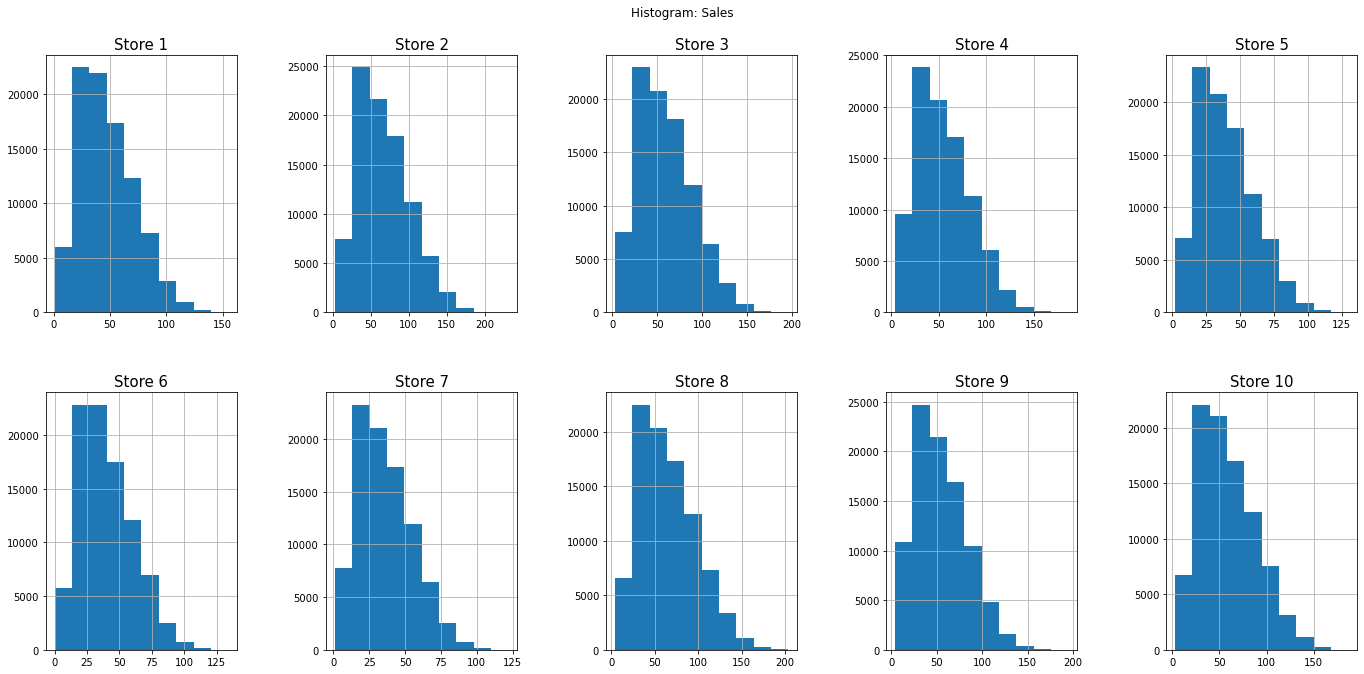

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        train[train.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 15)
        
    else:
        train[train.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("Store " + str(i), fontsize = 15)
plt.tight_layout(pad=4.5)
plt.suptitle("Histogram: Sales");

In [8]:
#converting date to datetime
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date             datetime64[ns]
store                     int64
item                      int64
sales                   float64
train_or_test            object
id                      float64
dtype: object

Breaking date into features

In [9]:
data['year'] = data.date.dt.year
data['quarter'] = data.date.dt.quarter
data['month'] = data.date.dt.month  
data['weekday'] = data.date.dt.weekday
data['dayofweek'] = data.date.dt.dayofweek

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           958000 non-null  datetime64[ns]
 1   store          958000 non-null  int64         
 2   item           958000 non-null  int64         
 3   sales          913000 non-null  float64       
 4   train_or_test  958000 non-null  object        
 5   id             45000 non-null   float64       
 6   year           958000 non-null  int64         
 7   quarter        958000 non-null  int64         
 8   month          958000 non-null  int64         
 9   weekday        958000 non-null  int64         
 10  dayofweek      958000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 120.0+ MB


In [11]:
#average sales per item in each quarter
data.groupby(['quarter', 'item'])['sales'].mean()

quarter  item
1        1       17.044789
         2       45.882483
         3       28.509756
         4       17.054324
         5       14.318182
                   ...    
4        46      54.573696
         47      20.465217
         48      47.761087
         49      27.176957
         50      61.120870
Name: sales, Length: 200, dtype: float64

In [12]:
#based on quarter
data['item_qt_mean'] = data.groupby(['quarter','item'])['sales'].transform('mean')
data['store_qt_mean'] = data.groupby(['quarter', 'store'])['sales'].transform('mean')
data['store_item_qt_mean'] = data.groupby(['quarter', 'store', 'item'])['sales'].transform('mean')

In [13]:
#based on month
data['item_mt_mean'] = data.groupby(['month','item'])['sales'].transform('mean')
data['store_mt_mean'] = data.groupby(['month', 'store'])['sales'].transform('mean')
data['store_item_mt_mean'] = data.groupby(['month', 'store', 'item'])['sales'].transform('mean')

In [14]:
#based on weekday
data['item_wd_mean'] = data.groupby(['weekday','item'])['sales'].transform('mean')
data['store_wd_mean'] = data.groupby(['weekday', 'store'])['sales'].transform('mean')
data['store_item_wd_mean'] = data.groupby(['weekday', 'store', 'item'])['sales'].transform('mean')

In [15]:
data.shape

(958000, 20)

Mean sales of products

In [16]:
mean_sales = train.groupby(['date'], as_index = False)
mean_sales = mean_sales[['sales']].mean()
mean_sales['idx'] = mean_sales.index

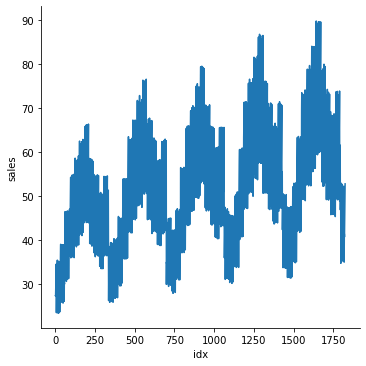

In [17]:
plot = sns.relplot(x = 'idx', y= 'sales', data = mean_sales, kind = 'line')

Sales growth by store

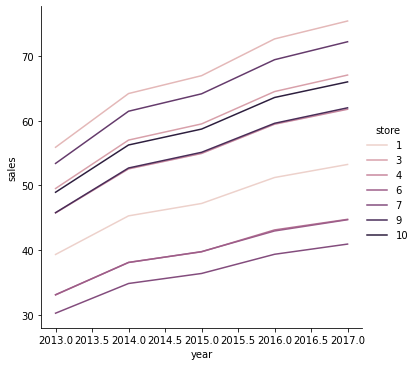

In [18]:
plot_data = data.groupby(['store', 'year'])
mean = plot_data[['sales']].mean()
mean = mean.add_suffix('').reset_index()
g = sns.relplot( y = 'sales', x = 'year', data = mean, kind = 'line', hue = 'store')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                958000 non-null  datetime64[ns]
 1   store               958000 non-null  int64         
 2   item                958000 non-null  int64         
 3   sales               913000 non-null  float64       
 4   train_or_test       958000 non-null  object        
 5   id                  45000 non-null   float64       
 6   year                958000 non-null  int64         
 7   quarter             958000 non-null  int64         
 8   month               958000 non-null  int64         
 9   weekday             958000 non-null  int64         
 10  dayofweek           958000 non-null  int64         
 11  item_qt_mean        958000 non-null  float64       
 12  store_qt_mean       958000 non-null  float64       
 13  store_item_qt_mean  958000 non

Train and Test data

In [20]:
data.drop(['date', 'id'], axis = 1, inplace = True)

In [21]:
X = data[data['train_or_test'] == 'train']
test_data = data[data['train_or_test'] == 'test']

In [22]:
X.head()

,store,item,sales,train_or_test,year,quarter,month,weekday,dayofweek,item_qt_mean,store_qt_mean,store_item_qt_mean,item_mt_mean,store_mt_mean,store_item_mt_mean,item_wd_mean,store_wd_mean,store_item_wd_mean
0,1,1,13.0,train,2013,1,1,1,1,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,20.279693,43.559923,18.168582
1,1,1,11.0,train,2013,1,1,2,2,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,20.414176,43.838621,18.793103
2,1,1,14.0,train,2013,1,1,3,3,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,21.687356,46.731188,19.452107
3,1,1,13.0,train,2013,1,1,4,4,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,23.245594,49.841379,21.015326
4,1,1,10.0,train,2013,1,1,5,5,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,24.730268,53.129042,22.973180


In [23]:
test_data.head()

,store,item,sales,train_or_test,year,quarter,month,weekday,dayofweek,item_qt_mean,store_qt_mean,store_item_qt_mean,item_mt_mean,store_mt_mean,store_item_mt_mean,item_wd_mean,store_wd_mean,store_item_wd_mean
0,1,1,NaN,test,2018,1,1,0,0,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,17.462308,37.471615,15.584615
1,1,1,NaN,test,2018,1,1,1,1,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,20.279693,43.559923,18.168582
2,1,1,NaN,test,2018,1,1,2,2,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,20.414176,43.838621,18.793103
3,1,1,NaN,test,2018,1,1,3,3,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,21.687356,46.731188,19.452107
4,1,1,NaN,test,2018,1,1,4,4,17.044789,36.854102,15.334812,14.830323,32.174452,13.709677,23.245594,49.841379,21.015326


In [24]:
test_data.drop('sales', axis = 1, inplace = True)

In [25]:
X.drop('train_or_test', axis = 1, inplace = True)
test_data.drop('train_or_test', axis = 1, inplace = True)

# Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9bc27a5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9bc27aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9bc27a280>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9bc5053a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9bc505700>],
 'means': []}

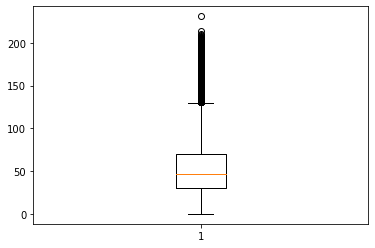

In [26]:
plt.boxplot(X['sales'])

In [27]:
q1 = np.percentile(X.sales, 25, interpolation = 'midpoint')
q3 = np.percentile(X.sales, 75, interpolation = 'midpoint')
IQR = q3 - q1
IQR

40.0

In [28]:
low = q1 - 1.5*IQR
high = q3 + 1.5*IQR
print(low)
print(high)

-30.0
130.0


In [29]:
out_1 = X.sales < low
ind1 = X.loc[out_1].index
len(ind1)

0

In [30]:
out_2 = X.sales > high
ind2 = X.loc[out_2].index
len(ind2)

11967

In [31]:
ind2.tolist()
X.drop(ind2, inplace = True)
X.shape

(901033, 17)

In [32]:
X.store.value_counts()

5     91300
7     91300
6     91298
1     91210
4     90576
9     90511
10    89841
3     89676
8     88234
2     87087
Name: store, dtype: int64

In [33]:
df = X.copy()

# Splitting training and validation set

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901033 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store               901033 non-null  int64  
 1   item                901033 non-null  int64  
 2   sales               901033 non-null  float64
 3   year                901033 non-null  int64  
 4   quarter             901033 non-null  int64  
 5   month               901033 non-null  int64  
 6   weekday             901033 non-null  int64  
 7   dayofweek           901033 non-null  int64  
 8   item_qt_mean        901033 non-null  float64
 9   store_qt_mean       901033 non-null  float64
 10  store_item_qt_mean  901033 non-null  float64
 11  item_mt_mean        901033 non-null  float64
 12  store_mt_mean       901033 non-null  float64
 13  store_item_mt_mean  901033 non-null  float64
 14  item_wd_mean        901033 non-null  float64
 15  store_wd_mean       901033 non-nul

In [35]:
y = df.sales
x = df.drop('sales', axis = 1)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [37]:
x_train.shape

(675774, 16)

In [38]:
x_valid.shape

(225259, 16)

# Model Building

1. XGBoost

In [47]:
import xgboost as xgb
params={'objective':'reg:linear','eval_metric':'mae', 'eta': 0.1, 'max_depth': 6, 'lambda':1}
matrix_train = xgb.DMatrix(x_train,label=y_train)
matrix_test = xgb.DMatrix(x_valid,label=y_valid)
model=xgb.train(list(params.items()), matrix_train, early_stopping_rounds=50,evals=[(matrix_train, 'train'),(matrix_test,'test')],
                   num_boost_round = 200, verbose_eval = 50)

[10:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:45.46661	test-mae:45.52518
[50]	train-mae:5.45356	test-mae:5.46500
[100]	train-mae:5.43564	test-mae:5.45883
[136]	train-mae:5.43033	test-mae:5.45946


2. LightGBM

In [39]:
import lightgbm as lgb

pd.set_option('display.max_columns', None)

In [40]:
model = lgb.LGBMRegressor(random_state = 42)

In [41]:
model.fit(x_train, y_train, eval_set = [(x_valid, y_valid), (x_train, y_train)], eval_metric = 'l1')

[1]	training's l1: 20.0947	training's l2: 603.544	valid_0's l1: 20.1004	valid_0's l2: 603.169
[2]	training's l1: 18.3047	training's l2: 504.081	valid_0's l1: 18.3124	valid_0's l2: 503.89
[3]	training's l1: 16.7195	training's l2: 422.962	valid_0's l1: 16.7308	valid_0's l2: 423
[4]	training's l1: 15.3046	training's l2: 356.671	valid_0's l1: 15.3177	valid_0's l2: 356.814
[5]	training's l1: 14.0364	training's l2: 302.081	valid_0's l1: 14.0524	valid_0's l2: 302.315
[6]	training's l1: 12.9158	training's l2: 257.6	valid_0's l1: 12.9322	valid_0's l2: 257.868
[7]	training's l1: 11.9311	training's l2: 221.086	valid_0's l1: 11.949	valid_0's l2: 221.383
[8]	training's l1: 11.0509	training's l2: 190.965	valid_0's l1: 11.0694	valid_0's l2: 191.269
[9]	training's l1: 10.2836	training's l2: 166.252	valid_0's l1: 10.3027	valid_0's l2: 166.553
[10]	training's l1: 9.61318	training's l2: 146.064	valid_0's l1: 9.63207	valid_0's l2: 146.366
[11]	training's l1: 9.02802	training's l2: 129.403	valid_0's l1: 9.

[88]	training's l1: 5.45111	training's l2: 49.4982	valid_0's l1: 5.45754	valid_0's l2: 49.7545
[89]	training's l1: 5.45088	training's l2: 49.4937	valid_0's l1: 5.45744	valid_0's l2: 49.753
[90]	training's l1: 5.45072	training's l2: 49.4908	valid_0's l1: 5.45741	valid_0's l2: 49.7529
[91]	training's l1: 5.45054	training's l2: 49.487	valid_0's l1: 5.45741	valid_0's l2: 49.7537
[92]	training's l1: 5.45035	training's l2: 49.483	valid_0's l1: 5.45737	valid_0's l2: 49.7539
[93]	training's l1: 5.45018	training's l2: 49.4807	valid_0's l1: 5.45733	valid_0's l2: 49.7533
[94]	training's l1: 5.45005	training's l2: 49.4782	valid_0's l1: 5.45731	valid_0's l2: 49.7531
[95]	training's l1: 5.44989	training's l2: 49.475	valid_0's l1: 5.45724	valid_0's l2: 49.7522
[96]	training's l1: 5.44973	training's l2: 49.472	valid_0's l1: 5.45723	valid_0's l2: 49.7522
[97]	training's l1: 5.44955	training's l2: 49.4684	valid_0's l1: 5.45719	valid_0's l2: 49.7508
[98]	training's l1: 5.44936	training's l2: 49.4645	vali

LGBMRegressor(random_state=42)

In [42]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_valid,y_valid)))

Training accuracy 0.9318
Testing accuracy 0.9314


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

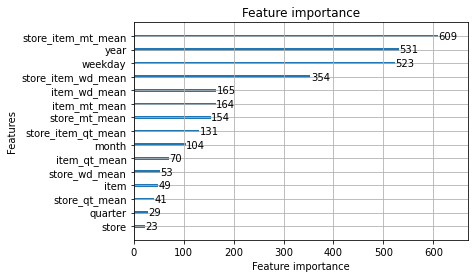

In [52]:
lgb.plot_importance(model)

# Prophet

In [43]:
train.head()

,date,store,item,sales,train_or_test
0,2013-01-01,1,1,13,train
1,2013-01-02,1,1,11,train
2,2013-01-03,1,1,14,train
3,2013-01-04,1,1,13,train
4,2013-01-05,1,1,10,train


In [44]:
test.head()

,id,date,store,item,train_or_test
0,0,2018-01-01,1,1,test
1,1,2018-01-02,1,1,test
2,2,2018-01-03,1,1,test
3,3,2018-01-04,1,1,test
4,4,2018-01-05,1,1,test


In [45]:
stats = train[['date', 'sales']]
stats.columns = ['ds', 'y']
stats.head()

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [46]:
from fbprophet import Prophet

In [55]:
pht_model = Prophet()
pht_model.fit(stats)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
test['ds'] = test['date']

In [58]:
future = pd.DataFrame(test['ds'])
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
44995,2018-03-27
44996,2018-03-28
44997,2018-03-29
44998,2018-03-30


In [59]:
pred = pht_model.predict(future)

In [60]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,60.335617,2.311628,64.765313,60.335617,60.335617,-26.606482,-26.606482,-26.606482,-10.863266,-10.863266,-10.863266,-15.743216,-15.743216,-15.743216,0.0,0.0,0.0,33.729135
1,2018-01-01,60.335617,-1.371823,67.395911,60.335617,60.335617,-26.606482,-26.606482,-26.606482,-10.863266,-10.863266,-10.863266,-15.743216,-15.743216,-15.743216,0.0,0.0,0.0,33.729135
2,2018-01-01,60.335617,-0.995259,67.408064,60.335617,60.335617,-26.606482,-26.606482,-26.606482,-10.863266,-10.863266,-10.863266,-15.743216,-15.743216,-15.743216,0.0,0.0,0.0,33.729135
3,2018-01-01,60.335617,-4.065436,64.050090,60.335617,60.335617,-26.606482,-26.606482,-26.606482,-10.863266,-10.863266,-10.863266,-15.743216,-15.743216,-15.743216,0.0,0.0,0.0,33.729135
4,2018-01-01,60.335617,0.766727,66.735456,60.335617,60.335617,-26.606482,-26.606482,-26.606482,-10.863266,-10.863266,-10.863266,-15.743216,-15.743216,-15.743216,0.0,0.0,0.0,33.729135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-31,61.059464,32.420824,100.006098,59.884347,62.337092,5.296945,5.296945,5.296945,6.415211,6.415211,6.415211,-1.118267,-1.118267,-1.118267,0.0,0.0,0.0,66.356409
44996,2018-03-31,61.059464,34.775598,99.656812,59.884347,62.337092,5.296945,5.296945,5.296945,6.415211,6.415211,6.415211,-1.118267,-1.118267,-1.118267,0.0,0.0,0.0,66.356409
44997,2018-03-31,61.059464,32.901592,99.435906,59.884347,62.337092,5.296945,5.296945,5.296945,6.415211,6.415211,6.415211,-1.118267,-1.118267,-1.118267,0.0,0.0,0.0,66.356409
44998,2018-03-31,61.059464,33.687454,100.615256,59.884347,62.337092,5.296945,5.296945,5.296945,6.415211,6.415211,6.415211,-1.118267,-1.118267,-1.118267,0.0,0.0,0.0,66.356409


In [61]:
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,33.729135,2.311628,64.765313
1,2018-01-01,33.729135,-1.371823,67.395911
2,2018-01-01,33.729135,-0.995259,67.408064
3,2018-01-01,33.729135,-4.065436,64.050090
4,2018-01-01,33.729135,0.766727,66.735456


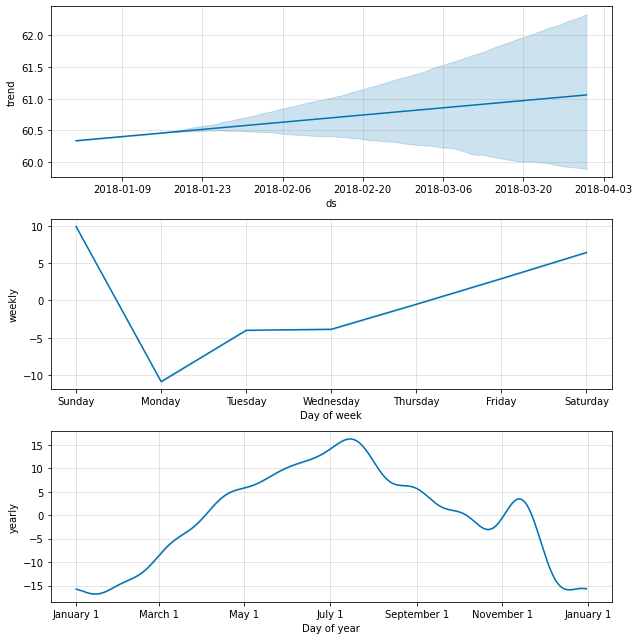

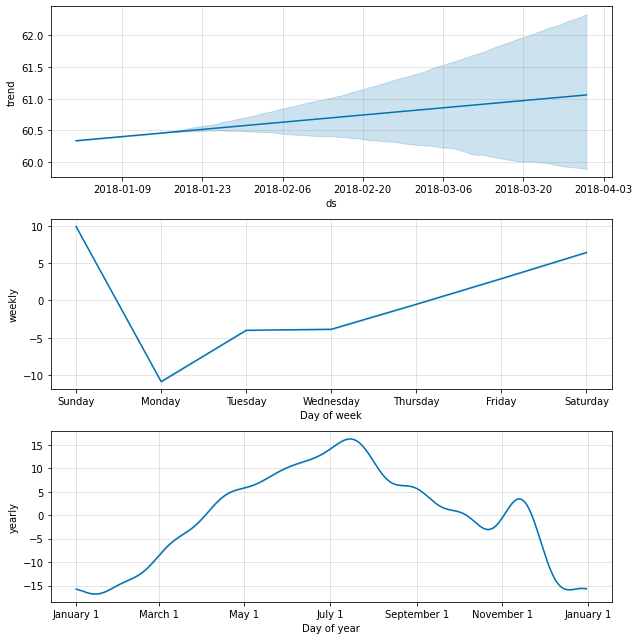

In [62]:
pht_model.plot_components(pred)